# Lab 15: Fourier transforms

This lab is a brief introduction to *discrete Fourier transforms*, the digital equivalent of the integration we use to perform integrals by hand. The formal definition is

$$
Y_n = \sum_{k=0}^{N-1} y_k \exp\left\{-2\pi \mathrm i \frac{kn}{N}\right\} \qquad n = 0,\ldots,N-1
$$

with inverse given by 

$$
y_k = \frac{1}{N}\sum_{k=0}^{N-1}Y_n\exp\left\{2\pi \mathrm i\frac{kn}{N}\right\} \qquad k = 0,\ldots,N-1.
$$

In practice we won't program these sums ourselves, but use the built-in functions from the `numpy.fft` module.

As usual, we start by importing some helper routines:

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftfreq, fftshift

## The basics

We begin by taking the transform of a function we know and understand well: let's sample the function $x = \cos(2\pi t)$ over a single period:

In [2]:
t = np.arange(-2.5, 2.5, 0.1)
x = np.cos(2*np.pi*t)
Fx = fft(x)

**`print` the discrete Fourier transform `Fx` just to see what this looks like.**

In [3]:
print(Fx)

[-4.11892742e-14+0.00000000e+00j -4.21329638e-14+8.60422844e-16j
 -4.73594376e-14+1.13759981e-15j -6.32141395e-14+7.57057791e-16j
 -1.16738704e-13-1.23411640e-15j -2.50000000e+01-3.51718654e-13j
  9.81255641e-14-3.28930496e-15j  4.97358195e-14-2.20416299e-15j
  3.55627652e-14+8.94479176e-16j  2.46455445e-14+4.35708404e-15j
  1.44555633e-14+6.03533783e-15j  9.33032274e-15+1.94953516e-15j
  7.36567961e-15+3.21887741e-16j  8.42152857e-15+9.78986101e-16j
  1.05396158e-14+3.42788006e-15j  8.88178420e-15+8.46279469e-15j
  3.48140185e-15+7.09259713e-15j -3.75736914e-16+1.81951679e-15j
 -1.88220561e-15-1.55368276e-15j  2.50382242e-15-1.60334597e-15j
  6.13907385e-15-7.93466672e-16j  7.63770609e-15+5.02218090e-16j
  6.31319833e-15-2.11869113e-15j  4.56972559e-15-2.27160431e-15j
  4.59212213e-15+1.60952852e-15j  5.99520433e-15-2.94148480e-16j
  4.59212213e-15-1.60952852e-15j  4.77656390e-15+2.14703664e-15j
  6.31319833e-15+2.11869113e-15j  7.08324215e-15-3.12281757e-16j
  6.13907385e-15+7.934666

Since our original data were sampled from a function of time $t$, the Fourier transform will be a function of frequency $f$ (note: linear, not angular frequency $\omega$). To plot this, we need to know what values of $f$ correspond to each point. This can be calculated using the built-in function `fftfreq`, which takes two arguments, the number of points and the timestep:

In [4]:
f = fftfreq(t.size, t[1])
print(f)

[-0.         -0.00833333 -0.01666667 -0.025      -0.03333333 -0.04166667
 -0.05       -0.05833333 -0.06666667 -0.075      -0.08333333 -0.09166667
 -0.1        -0.10833333 -0.11666667 -0.125      -0.13333333 -0.14166667
 -0.15       -0.15833333 -0.16666667 -0.175      -0.18333333 -0.19166667
 -0.2         0.20833333  0.2         0.19166667  0.18333333  0.175
  0.16666667  0.15833333  0.15        0.14166667  0.13333333  0.125
  0.11666667  0.10833333  0.1         0.09166667  0.08333333  0.075
  0.06666667  0.05833333  0.05        0.04166667  0.03333333  0.025
  0.01666667  0.00833333]


**Plot the real part** (`Fx.real`) **of the Fourier transform `Fx` against the frequencies `f`, using points rather than lines** (*i.e.*, 'o' or '.')**. Describe the resulting graph. Is it what you expect?**

<IPython.core.display.Javascript object>


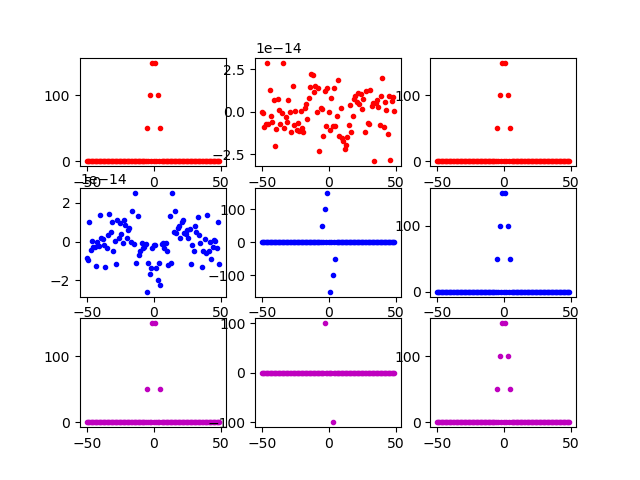

In [5]:
from pylab import plot as plt
plt(f,Fx.real, 'o')

**What happens to the Fourier transform when you sample for several periods rather than one (*e.g.*, when you change the upper limit of `t` to 2 or 3 or 4)?** 

**What happens when you increase the sampling frequency of the data (*e.g.*, when you change the time interval, the third argument of `arange`, to 0.05 or 0.01)?**

*Extension:* Why is it better to use `arange` here than `linspace`?

In [6]:
t = np.arange(0, 4, 0.1)
f = fftfreq(t.size, t[1])
x = np.cos(2*np.pi*t)
Fx = fft(x)
plt(f,Fx.real, 'ro')

t = np.arange(0, 1, 0.01)
f = fftfreq(t.size, t[1])
x = np.cos(2*np.pi*t)
Fx = fft(x)
plt(f,Fx.real, 'bo')
Fx.imag

array([ 0.00000000e+00, -1.88250832e-15, -8.89341772e-16,  3.55951662e-16,
        1.81090449e-15, -2.06817510e-15, -1.20520306e-16,  1.75999361e-15,
       -1.85105515e-15, -1.00316856e-15, -5.86059012e-16, -2.29021991e-17,
        1.32398442e-15,  1.18593552e-15, -1.41956133e-15, -1.84487445e-15,
        1.60641329e-15,  1.25327199e-16, -3.40914459e-16,  1.82798896e-16,
        9.40213555e-16, -1.33365361e-15, -1.28127964e-15,  2.30383487e-15,
        4.42708191e-16, -3.56727524e-16,  1.52660279e-16,  1.22893610e-15,
       -3.87374190e-16, -7.14025312e-16,  7.63483554e-16,  1.09386017e-15,
        4.07605037e-16,  1.05259073e-15, -1.37526274e-15, -6.59204210e-16,
        1.60374013e-15,  1.16730034e-15, -1.95978315e-15,  5.22466941e-16,
        5.44604009e-16, -5.57861683e-16, -1.30076194e-16,  1.93369276e-17,
        9.56540734e-16, -1.56872912e-17, -2.82696404e-15,  3.43381619e-17,
        3.97001880e-15,  1.09251386e-15,  0.00000000e+00, -6.20379405e-16,
       -3.97001880e-15, -

▶ **CHECKPOINT 1**

## Different periodic functions

Let's now return to the time range and sampling frequency we started with:

In [7]:
t = np.arange(0, 1, 0.01)
?subplot

Object `subplot` not found.


**Calculate and plot the discrete Fourier transforms of the following functions:**

1. $x = 3\cos(2\pi t) + 2\cos(3\times 2\pi t) + \cos(5\times 2\pi t)$
1. $x = 3\sin(2\pi t) + 2\sin(3\times 2\pi t) + \sin(5\times 2\pi t)$
1. $x = 3\cos(2\pi t) + 2\sin(3\times 2\pi t) + \cos(5\times 2\pi t)$

**What do you notice? Do these behave as you expect?**

*Hint:* You may want to look at the magnitude (`abs(Fx)`) and/or imaginary part (`Fx.imag`) of the Fourier transform, as well as the real part (`Fx.real`).

<IPython.core.display.Javascript object>


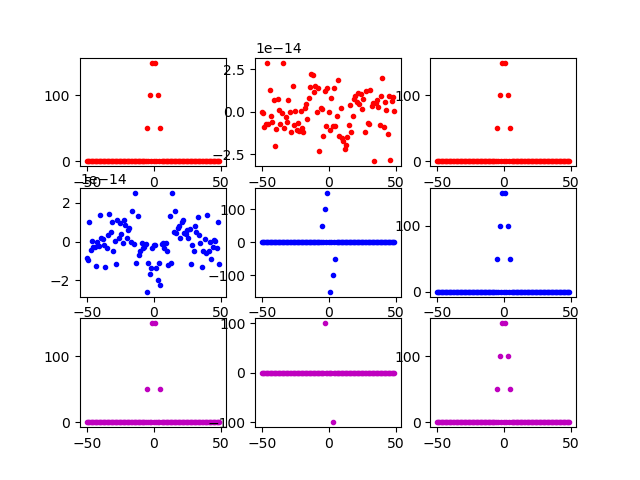

In [27]:
from pylab import subplot
x1 = (3*np.cos(2*np.pi*t)) + (2*np.cos(6*np.pi*t))+(np.cos(10*np.pi*t))
x2 = (3*np.sin(2*np.pi*t)) + (2*np.sin(6*np.pi*t))+(np.sin(10*np.pi*t))
x3 = (3*np.cos(2*np.pi*t)) + (2*np.sin(6*np.pi*t))+(np.cos(10*np.pi*t))
f = fftfreq(t.size, t[1])

Fx = fft(x1)
subplot(3, 3, 1)
plt(f, Fx.real, 'r.')
subplot(3, 3, 2)
plt(f, Fx.imag, "r.")
subplot(3, 3, 3)
plt(f, abs(Fx), "r.")

Fx = fft(x2)
subplot(3, 3, 4)
plt(f, Fx.real, 'b.')
subplot(3, 3, 5)
plt(f, Fx.imag, "b.")
subplot(3, 3, 6)
plt(f, abs(Fx), "b.")

Fx = fft(x3)
subplot(3, 3, 7)
plt(f, Fx.real, 'm.')
subplot(3, 3, 8)
plt(f, Fx.imag, "m.")
subplot(3, 3, 9)
plt(f, abs(Fx), "m.")

#print(Fx)

To investigate the effects of an offset in $x$ or $t$, for fun we will use interactive Python widgets. The following code lets you interactively explore the effect of changing $A$ or $B$ in the function $x(t) = A\sin(2\pi t + B)$:

<IPython.core.display.Javascript object>


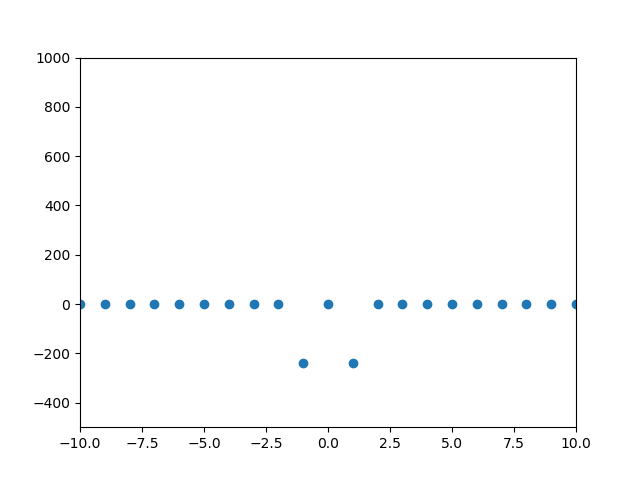

In [25]:
from ipywidgets import interact
from matplotlib.pyplot import figure, gca

figure()
axes = gca()

In [26]:
t = np.arange(0, 1, 0.01)

@interact(A=(0,10,0.1), B=(0,10,0.1))
def showfft(A, B):
    x = A*np.sin(2*np.pi*t + B) 
    Fx = fft(x)
    axes.clear()
    axes.plot(fftfreq(t.size, t[1]), Fx.real, 'o')
    axes.set_xlim(-10, 10)
    axes.set_ylim(-500, 1000)

interactive(children=(FloatSlider(value=5.0, description='A', max=10.0), FloatSlider(value=5.0, description='B…

**Find the effect of changing $A$ in this equation.**

**At the moment it seems like changing $B$ has no effect. Modify the code to show what effect this actually has.** (*Hint*: try plotting the real or imaginary components of the Fourier transform.)

**Modify the code to use the equation $x(t) = A\sin(2\pi t + B) + C$, where $C$ can now also vary. What effect does this have on the Fourier transform?**

<IPython.core.display.Javascript object>


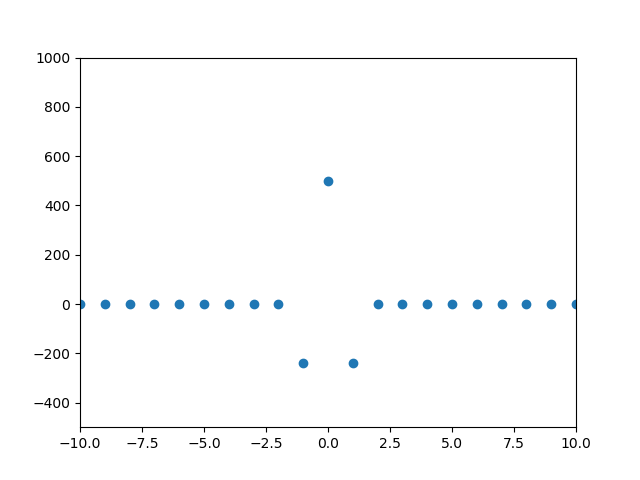

interactive(children=(FloatSlider(value=5.0, description='A', max=10.0), FloatSlider(value=5.0, description='B…

In [19]:
figure()
axes = gca()
t = np.arange(0, 1, 0.01)

@interact(A=(0,10,0.1), B=(0,10,0.1), C= (0,10,0.1))
def showfft(A, B, C):
    x = A*np.sin(2*np.pi*t + B) + C 
    Fx = fft(x)
    axes.clear()
    axes.plot(fftfreq(t.size, t[1]), Fx.real, 'o')
    axes.set_xlim(-10, 10)
    axes.set_ylim(-500, 1000)

▶ **CHECKPOINT 2**

## Filtering

We'll now see how we can use Fourier transforms to filter out unwanted noise. I've provided some noisy data in the file `signal.txt`:

In [20]:
noisy_data = np.loadtxt('signal.txt')

**Plot these data** and verify that there is no clear signal.

<IPython.core.display.Javascript object>


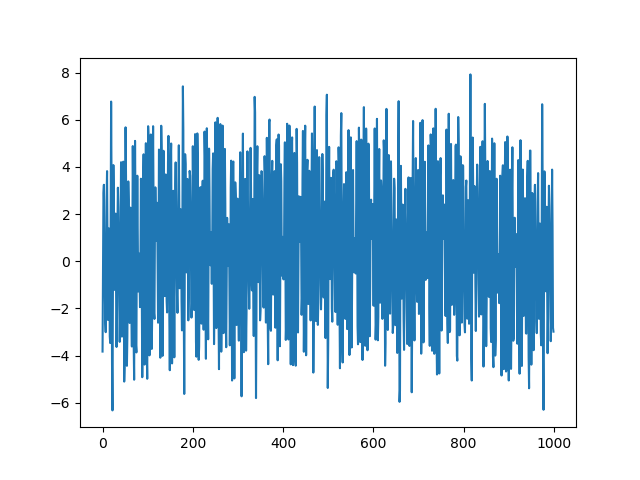

In [21]:
plt(noisy_data)

**Take the Fourier transform of these data and plot the result. What do you notice?**

*Hint:* as noted in class, the conventional order for the discrete Fourier transform results is to start with the zero-frequency component, then present positive frequencies increasing until the middle of the data set. Then the most negative frequencies are presented, increasing until zero is reached again at the end of the data set. What this means is that the low-frequency data are clustered at either end of the plot, and the high-frequency data are in the middle.

If this is unbearably confusing, then use the built-in function `fftshift` to transform the Fourier transform data so that zero is in the middle, where we might expect it to be. However, you should do this only for your own ease of understanding: continuing the calculations will be easiest with the FT as it is calculated by default.

<IPython.core.display.Javascript object>


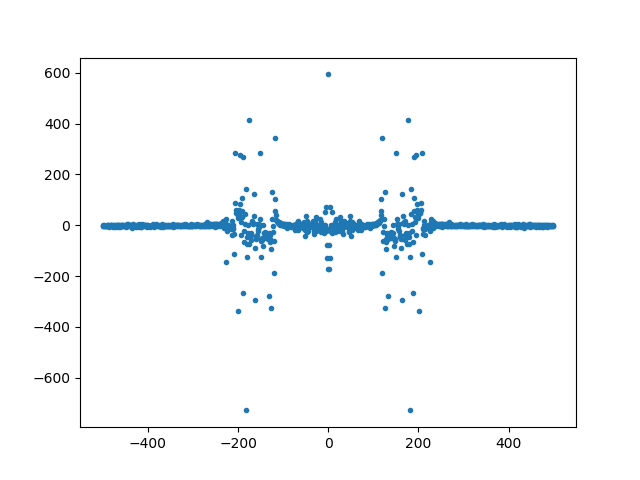

J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [22]:
t = np.arange(0, 1, 0.001)
Fx = fft(noisy_data)
f = fftfreq(t.size, t[1])
plt(f,Fx,'.')

Choose carefully the components of the FT that are responsible for the noise, and **set these elements of the FT array to zero.**

<IPython.core.display.Javascript object>


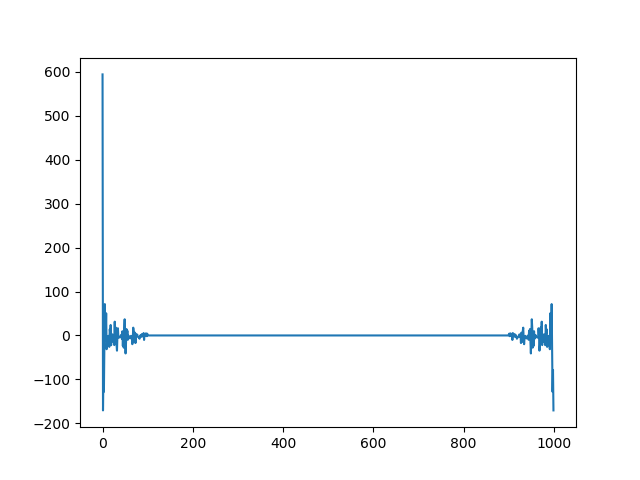

J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [23]:
Fx = fft(noisy_data)
Fx[100:900] = 0
plt(Fx, "-")
#Fx.size

**Calculate the inverse FT (`ifft`) of the modified FT array, and plot this. Can you see, and interpret, the signal now?**

(*Hint:* see https://en.wikipedia.org/wiki/Morse_code if you're struggling.)

<IPython.core.display.Javascript object>


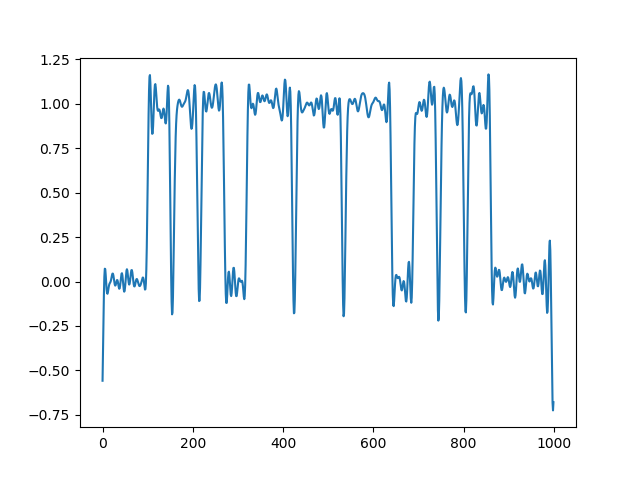

J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [24]:
inv_Ft = ifft(Fx)
plt(inv_Ft)

▶ **CHECKPOINT 3**

**Extension**: Take $x(t)$ from one of the anharmonic oscillators in lab 12, and analyse the frequency spectrum.

*Hint*: Your data will be cleaner if, as best you can, you sample an integer number of oscillations.